In [ ]:
import pandas as pd
import mlxtend
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules,apriori 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project_github/Market basket Analysis/supermarket1.csv')
df.columns #เช็คคอลัมน์
df.info() #เช็คข้อมูลของdata frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   desserts           10000 non-null  int64
 1   meats              10000 non-null  int64
 2   juices             10000 non-null  int64
 3   paper_goods        10000 non-null  int64
 4   frozen_foods       10000 non-null  int64
 5   snack_foods        10000 non-null  int64
 6   canned goods       10000 non-null  int64
 7   beer_wine_spirits  10000 non-null  int64
 8   dairy              10000 non-null  int64
 9   breads             10000 non-null  int64
 10  produce            10000 non-null  int64
 11  receipt_id         10000 non-null  int64
dtypes: int64(12)
memory usage: 937.6 KB


In [ ]:
if df.isnull().any().any():
    print("DataFrame contains missing values")
else:
    print("DataFrame does not contain missing values")

DataFrame does not contain missing values


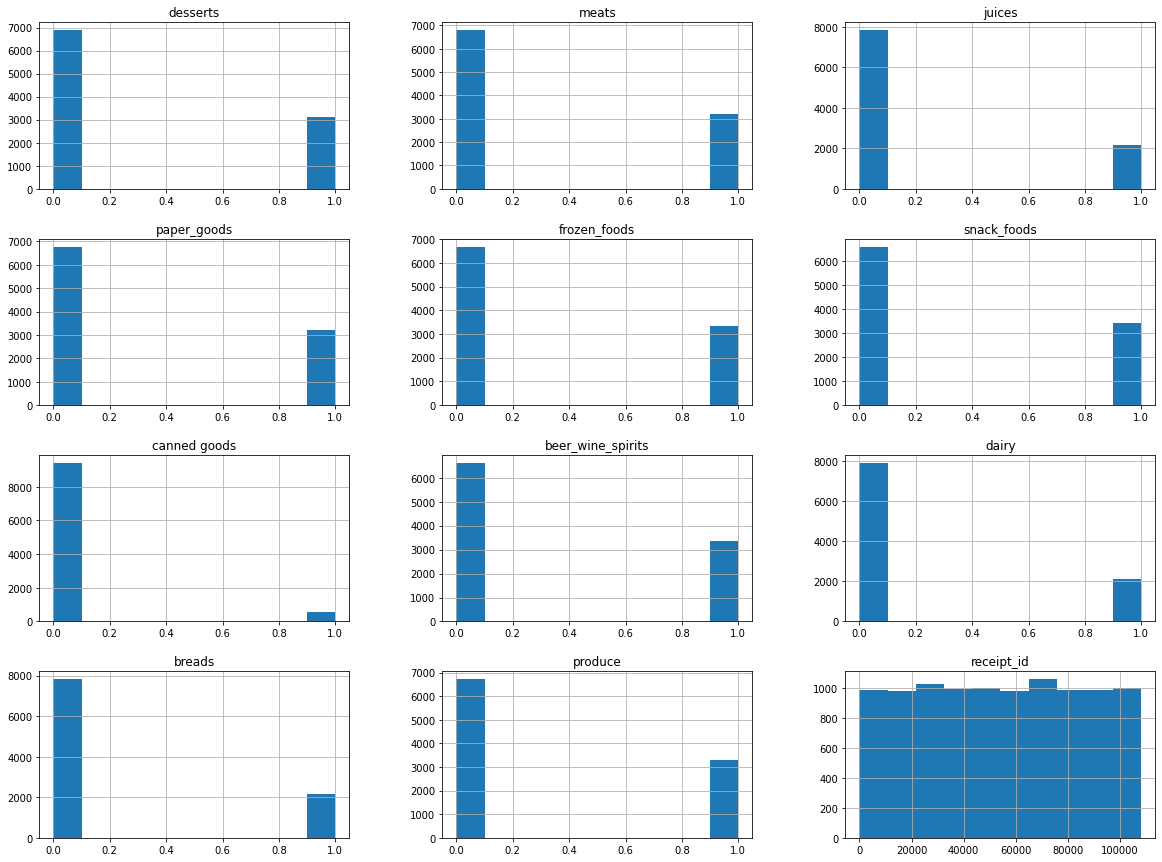

In [ ]:
df.hist(bins=10, figsize=(20,15))
plt.show()



In [ ]:
df = df.astype(pd.SparseDtype("bool")) #เปลี่ยนข้อมูลเป็น True=1 False=2




In [ ]:
#หาค่า mininum support ผมตั้ง min_support ไว้น้อยเนื่องจากถ้าตั้งไว้มากจะไม่เจอ
frequent_itemsets = apriori(df,min_support=0.1,use_colnames=True)
frequent_itemsets.sort_values('support',ascending=False)

,support,itemsets
10,1.0000,(receipt_id)
27,0.3403,"(snack_foods, receipt_id)"
5,0.3403,(snack_foods)
29,0.3381,"(beer_wine_spirits, receipt_id)"
6,0.3381,(beer_wine_spirits)
4,0.3320,(frozen_foods)
24,0.3320,"(frozen_foods, receipt_id)"
32,0.3281,"(produce, receipt_id)"
9,0.3281,(produce)
3,0.3226,(paper_goods)


In [ ]:
#สร้าง association rules
# หาค่าconfidence
# จากแถว 0 อ่านได้ว้า คนที่ซื้อ snack_foods กับ frozen_food จะซื้อ beer_wine_spirits ด้วย ที่confidence 81.7%
rules = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.8)
rules[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(desserts),(receipt_id),0.3122,1.0,0.3122,1.0,1.0,0.0,inf
1,(meats),(receipt_id),0.3210,1.0,0.3210,1.0,1.0,0.0,inf
2,(juices),(receipt_id),0.2164,1.0,0.2164,1.0,1.0,0.0,inf
3,(paper_goods),(receipt_id),0.3226,1.0,0.3226,1.0,1.0,0.0,inf
4,(frozen_foods),(receipt_id),0.3320,1.0,0.3320,1.0,1.0,0.0,inf
5,(snack_foods),(receipt_id),0.3403,1.0,0.3403,1.0,1.0,0.0,inf
6,(beer_wine_spirits),(receipt_id),0.3381,1.0,0.3381,1.0,1.0,0.0,inf
7,(dairy),(receipt_id),0.2108,1.0,0.2108,1.0,1.0,0.0,inf
8,(breads),(receipt_id),0.2183,1.0,0.2183,1.0,1.0,0.0,inf
9,(produce),(receipt_id),0.3281,1.0,0.3281,1.0,1.0,0.0,inf
